# **CS985: Machine Learning for Data Analytics Assignment** 
>**Task 1: Breast Cancer Classification**
---

>>## **Group 3: Data Assasins** 
---

><p align= "Center">Team Members

|Student Name|Registration Number|
|----|---|
|Sabarishbabu Murugesan | 202283857|
|Osaze Florence Onamhengben| 202183487|
|Pavithran Rajan | 202267111|
|Suraju Oladimeji Waisu | 202284756|
|Tientcheu Wansi Ludovic | 202270286|

---
> Lab Tutor: Francesco Meggetto
---

# Introduction

><p align= "Justify"> Medical scientists define a tumour as an unexpected growth of human cells in the human body. Tumours can be life-threatening and classified into two types (see figure below). When the abnormal proliferation affects other cells in the human body, it is classified as malignant, meaning an invasion of cancerous cells. This tumour is the most dangerous. It develops rapidly and can reach the whole body, but it is possible to stop if detected early; even though it might happen, it recurs afterwards. The other type of tumour is classified as benign. It is less dangerous than the former yet requires as much attention even though it tends not to invade other tissue than the ones it has infected. Therefore, when people go to the hospital and are diagnosed with cancer, the cancer doctor (also called oncologists) runs tests to determine whether the tumour is benign or malignant because there is no straightforward way to classify tumours immediately. The oncologist runs biopsies, surgery, and Image testing as part of the diagnosis process. (Differences Between a Malignant and Benign Tumor, 2022). Humans can have cancer in any part of the body, and breast cancer is one of the most common. 

![](https://drive.google.com/uc?export=view&id=1BkTljjCKf0R9LakakWNmwIWFmRZ-2VTb) (Verywell Health, 2022)

><p align= "Justify"> Thus, to help oncologists classify the different tumours effectively and initiate instantaneously appropriate medical care, a data set of programmed images from the University of Wisconsin, Clinical Sciences Center is available to allow machine learners to train robots that can do that. This dataset describes the cells of many patients diagnosed with breast cancer collected from the Center for Machine Learning and Intelligence Systems, UCI. 


## Problem statement

>Is it possible to help oncologists classify Tumours into Benign and Malignant types with Deep Neural Networks?

><p align= "Justify">Based on the materials provided in this academic module, the current practice uses the attributes in the dataset to predict the form of tumour (malignant or benign) using the appropriate configuration of either the number of layers, neurons, activation parameters, functions, optimisers.  

## Definition of Key features

Based on the Center for Machine Learning and Intelligence Systems, UCI, the attributes of the dataset are as follow: 
1. **ID number**
2. **Diagnosis (1 = malignant, 0 = benign) and,**
3. **29 columns of the rest of the attributes measured on mean, standard error, and worst, from the computed cells’ images, namely:** 
* Radius (mean of distances from center to points on the perimeter)
* Texture (standard deviation of gray-scale values)
* Perimeter
* Area
* Smoothness (local variation in radius lengths)
* Compactness (perimeter^2 / area - 1.0)
* Concavity (severity of concave portions of the contour)
* Concave points (number of concave portions of the contour)
* Symmetry
* Fractal dimension ("coastline approximation" - 1)

![](https://drive.google.com/uc?export=view&id=1CEysgSIy77UA2OdWNY9Cwq0vv1GWX2UB) (source: Ara et al., 2021)

## Methodology

The program runs down the following majors' steps to predict likely results of either a benign or malign tumour. 
-	 Data description
-	Data analysis
-	Data training and testing


# Data Description

**Importing the librairies**

First of all, the work starts by uploading the necessary libraries to run functions that are not part of the main program but essentially for the robot to work effectively. 

* Pandas, to read data in tables for analysis, cleaning and processing csv file
* Numpy, to manage multi-dimensional arrays, high-level mathematical functions
* Matplot, to visualise data in graphs
* Seaborn, to consolidate data visualisation of Matplot
* Sklearn for classification prediction 

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.core.tools.datetimes import Scalar
from sklearn.preprocessing import MinMaxScaler #function to scaling the data between 0 and 1
from sklearn.preprocessing import StandardScaler #funtion to scaling the data between the previous selectected min and max
from sklearn.model_selection import train_test_split #function to rapidly split subsets of train and test data

# Data Analysis

In [ ]:
dataset = pd.read_csv("train_100r.csv") #loading the dataset

In [ ]:
dataset.head(5) #showing the first five data content in the training dataset respectively with the attributes in 32 columns. 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414


In [ ]:
print(dataset.describe().T) #presenting a statistical summary of the training dataset  

                           count          mean          std           min  \
id                       25524.0  12761.500000  7368.288472  0.000000e+00   
diagnosis                25524.0      0.499843     0.500010  0.000000e+00   
radius_mean              25524.0     12.587571     3.503795  3.191287e+00   
texture_mean             25524.0     18.797795     5.360127  5.996412e+00   
perimeter_mean           25524.0     97.909665    27.442430  3.626174e+01   
area_mean                25524.0    670.853706   389.374163  1.306694e+01   
smoothness_mean          25524.0      0.106022     0.017768  4.157827e-02   
compactness_mean         25524.0      0.145079     0.074372  6.820211e-03   
concavity_mean           25524.0      0.150999     0.129404  3.590000e-06   
concave points_mean      25524.0      0.084847     0.058930  9.030000e-06   
symmetry_mean            25524.0      0.210100     0.039238  1.131992e-01   
fractal_dimension_mean   25524.0      0.060882     0.007007  3.942545e-02   

> > The training data set presents about 25524 datas in 32 columns

> > Statistical summary: count for the number of null value; mean for the mean of the values ¦ std for the standard deviation ¦ min for the minimum value

In [ ]:
print(dataset.isnull().sum()) # cheking the null value in the dataset

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


> > Displaying the details of null values in the dataset.

In [ ]:
print(dataset.dtypes)

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

> ><p align= "Justify"> A dataset can store various data types. Therefore, it is crucial to know the type of information stored in a dataset as it impacts the programming process. In this case, there are all numerical data: integers and floating-point numbers. So no conversion is needed. 

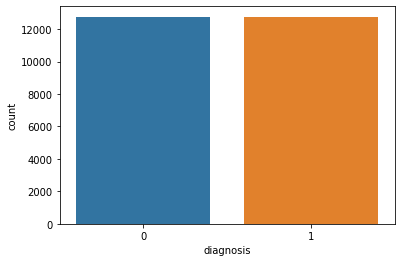

In [ ]:
sns.countplot(x="diagnosis", data=dataset)

> > <p align= "Justify">In this dataset, the predicting column is the column diagnosis. It contains  0 for a benign tumour or 1 for a malign tumour evenly distributed for about 12761 each.  

# Data Pre-processing

## Removing Correlation columns

><p align= "Justify">Due to the large set of data, removing highly correlated attributes stops feeding similar information to the robots. The method used here is Pearson's Correlation, as it is also efficient for both linear and non-linear correlation and if the data contain noise(Kachouie and Deebani, 2020).

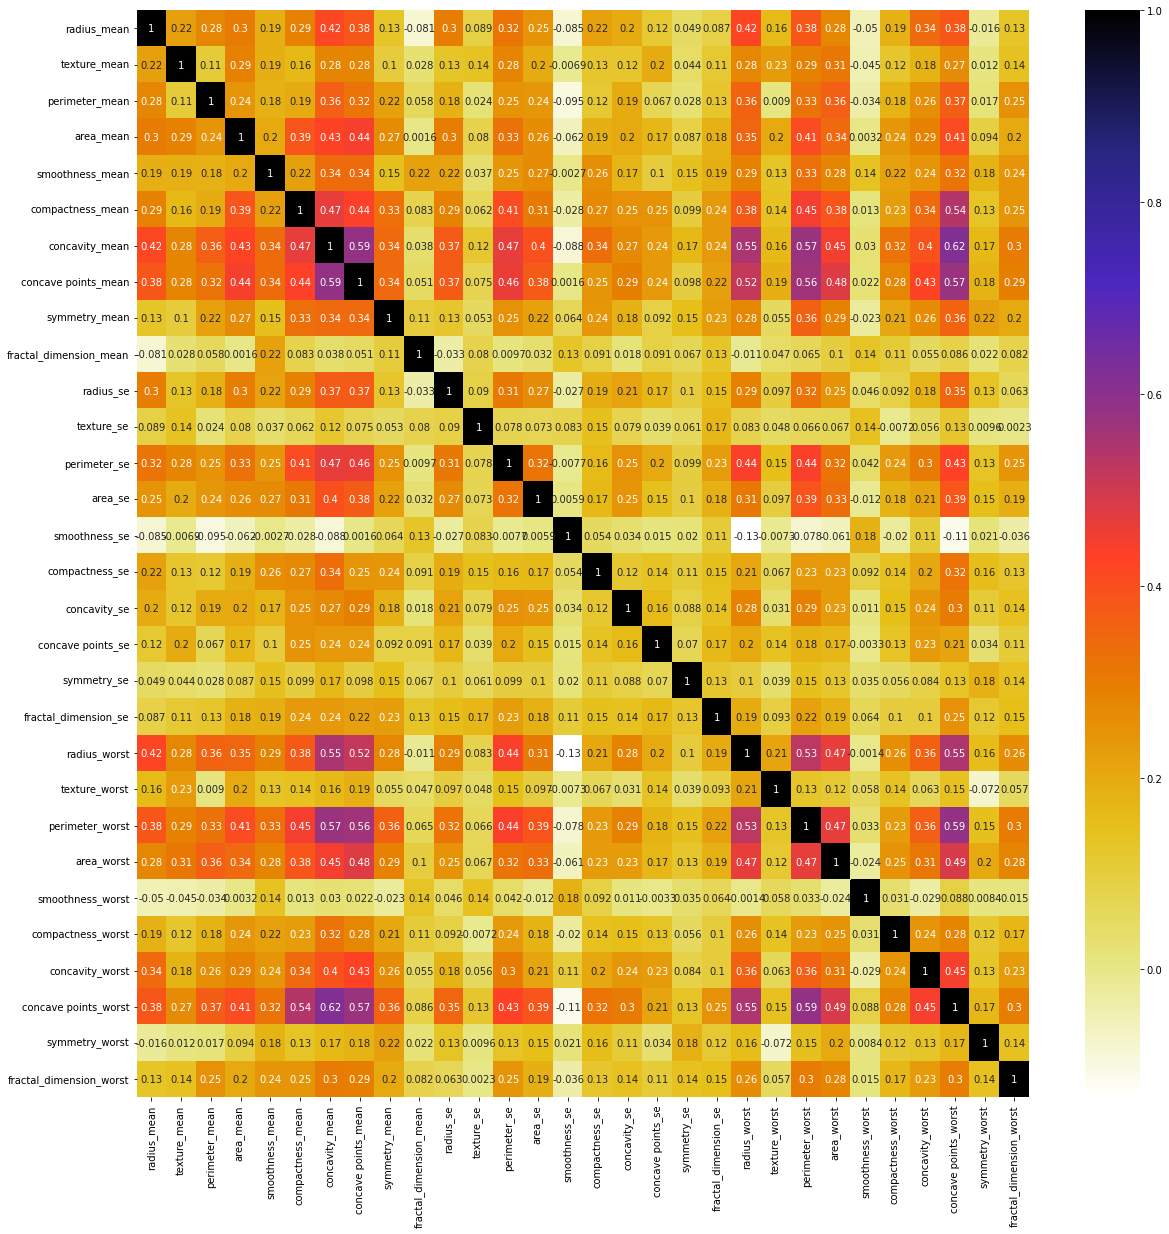

In [ ]:
import seaborn as sns 
plt.figure(figsize=(20,20)) #ploting the values from -1 to +1, in cells of size of 20 by 20 
cor = dataset.drop(columns=['id','diagnosis']).corr() #dropping the column id and diagnosis
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) #organising the colour of the plot for a better view
plt.show()

> ><p align= "Justify"> Based on the following algorithm, the highly correlated features for a threshold of 0.7 are concave points_worst and concavity_mean. 

In [ ]:
#Here the function defined parcour the entire data set to look for highly correlated correspondence
#(pandas?, Wu and DAGA, 2022)

def correlation(dataset, threshold):
  col_corr = set() #setting the correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold: #comparision according to the absolute coefficient value
        colname = corr_matrix.columns[i] #colleecting the name of the different columns 
        col_corr.add(colname)
  return col_corr

In [ ]:
#It is worht mentionning this pearson's correlation is done only on the training dataset because once the highly correlated features are known they can simply be removed from the test dataset to avoid overfitting 

corr_features = correlation(dataset, 0.7) #threshold of 0.7
len(set(corr_features))

corr_features

{'concave points_worst', 'concavity_mean'}

In [ ]:
#Based on the previous result, the highly correlated features for a threshold of 0.7 are concave points_worst and concavity_mean.

dataset = dataset.drop(corr_features, axis=1)

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.120906,0.210508,...,0.003074,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.018798,0.226011,...,0.006299,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.054136,0.186815,...,0.002495,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.024589,0.221436,...,0.006227,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.046933,0.301315,...,0.008266,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.342547,0.105414


## Outlier Removal


><p align= "Justify"> Analysing data include investigating the data behaviour. In machine learning, the are so-called outliers defined as the set of data deviating from the rest of the dataset. These are often considered as values that decrease the statical efficiency of the dataset. Usually, outliers manifest due to human error when registering the data or randomly due to unexpected irregularity intrinsic to the dataset. So it is worth identifying and removing them when necessary, especially outliers caused by human mistakes (Grubbs, 1969).



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

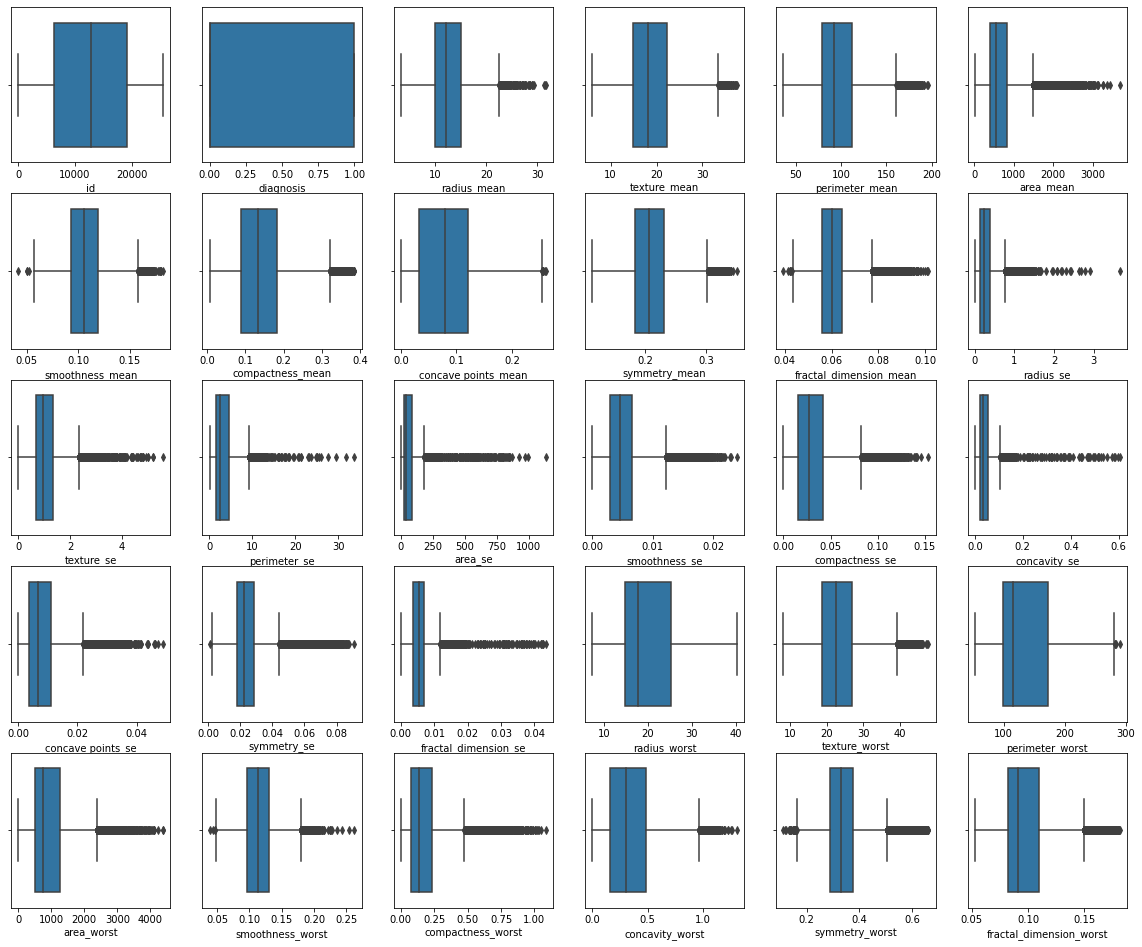

In [ ]:
plt.figure(figsize=(20,20))     #ploting the values in cells of size of 20 by 20
for i in range(len(dataset.columns)): #for each column
  plt.subplot(6, 6, i+1)    #create a new plot view of size 6 by 6 starting at index 1 rather than 0
  sns.boxplot(dataset[dataset.columns[i]])    #each plot box for each column
plt.show()    #show the plots

In [ ]:
#Here the programm try to look further in the data to identify outlier following what was plotted earlier

from scipy import stats    #importaing a additional function called stats from the library SciPy to manage statistics such as probability distributions, summary and frequency statistics, correlation functions.

def get_outlier_counts(dataset, threshold):     #threshold here is the limit of acceptable data being no outliers
  dataset = dataset.copy()    #copying of the dataframe


#z-score method with mean 0 and variance 1, per the threshold (ATKIN, 2022).

  threshold_z_score = stats.norm.ppf(threshold)      # getting the z-score (coordinate on axis x) and passing on the treshold into the ppf (percent point function) methdod to use percentage values

  z_score_df = pd.DataFrame(np.abs(stats.zscore(dataset)), columns=dataset.columns)     #getting a z-scrore for every value in the dataset in restpect to their columns either positve or negative 

  return (z_score_df > threshold_z_score).sum(axis=0)      #considering the z-score of each values that exceeds the z-score of the threshold value as outliers

In [ ]:
#here the program finally counts the number of ouliers, per columns in respect to the threshold of 0.9999, while exluding the columns id and diagnosis 

get_outlier_counts(dataset.drop(columns=['id','diagnosis']),0.99999) 

radius_mean                 15
texture_mean                 0
perimeter_mean               0
area_mean                   96
smoothness_mean              1
compactness_mean             0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean      60
radius_se                   73
texture_se                  86
perimeter_se                37
area_se                    146
smoothness_se               86
compactness_se              65
concavity_se                74
concave points_se           88
symmetry_se                180
fractal_dimension_se        89
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                  86
smoothness_worst            10
compactness_worst          124
concavity_worst              0
symmetry_worst               0
fractal_dimension_worst      0
dtype: int64

In [ ]:
#what is the best threshold ? here instead of counting the outliers as above, the program will get the oulier indeces to identify the threshold to use

def remove_outliers(dataset, threshold):
  
  dataset = dataset.copy()

#getting the z-score of each value
  threshold_z_score = stats.norm.ppf(threshold)   

  z_score_df = pd.DataFrame(np.abs(stats.zscore(dataset)), columns=dataset.columns)
  z_score_df = z_score_df > threshold_z_score

#getting the outliers indices
  outliers =  z_score_df.sum(axis=1)    #summing up the outliers accross the rows on the axis 1
  outliers = outliers > 0               #for each given outlier, drop the row if there is at least 1 outlier in that row
  outlier_indices = dataset.index[outliers]

  dataset = dataset.drop(outlier_indices, axis = 0).reset_index(drop=True)     #from the dataset exclude the outlier and return the new dataset from the axis 0 and reset the index to avoing missing indeces

  return dataset

In [ ]:
#Here is the result of the outlier removal with about 1,281 data purged from the orginal dataset

remove_outliers(dataset, 0.99999)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.120906,0.210508,...,0.003074,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.018798,0.226011,...,0.006299,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.054136,0.186815,...,0.002495,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.024589,0.221436,...,0.006227,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.046933,0.301315,...,0.008266,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.342547,0.105414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24238,25518,1,14.885827,22.334304,82.265423,414.589763,0.119799,0.143692,0.038001,0.204798,...,0.006364,32.439844,19.164284,118.450849,1135.783430,0.085887,0.113790,0.093434,0.562907,0.094648
24239,25519,1,15.378199,24.524667,72.034191,1250.914638,0.098105,0.252529,0.068795,0.198235,...,0.006247,31.305429,16.780569,190.050792,627.759997,0.121920,0.000928,0.074436,0.350512,0.118959
24240,25520,0,15.591372,10.434691,72.715151,564.971643,0.103050,0.058673,0.075847,0.236273,...,0.005708,15.636271,23.465578,104.049866,622.124967,0.097562,0.141443,0.092315,0.236337,0.090834
24241,25521,0,12.706935,14.591663,86.934808,449.956769,0.078482,0.144404,0.026877,0.208236,...,0.003920,13.711438,27.785133,99.711919,365.513346,0.115682,0.348765,0.348779,0.270028,0.082580


> ><p align= "Justify"> The method above involves the z-score from the standard normal distribution with mean 0 and variance 1. This will identify outliers from their distance to the mean per the threshold. The method found  1,281 outliers. 

## Scaling and Sampling the Data

><p align= "Justify">The analysis is concluded with a data preprocessing to feed the robot information it can clearly understand during the training and testing. Besides, the training and testing will evolve with the cleaned dataset with no outliers or correlated columns. 

In [ ]:
#Here the progamm use a funtion that will return the cleaned intputs: x_train and y_train for the training and x_test and y_test for the testing

def preprocess_inputs(dataset, outliers=True, threshold=0.99999):   #gathering the dataset with the outlier and threshold value
  dataset = dataset.copy()      

  if outliers == False:        #checking whether to use outliers or not (obviouly no)
    dataset = remove_outliers(dataset, threshold)       #using the outlier remover function to keep the no outliers

  x = dataset.drop(labels=["diagnosis","id"], axis=1).copy()  #setting up the x axis by excluding the id and diagnosis colunmn used for the testing
  y = dataset["diagnosis"].copy()    #setting up the y axis by copying only the diagnosis column

  #from the above axis partitioning the function train_test_split split the training set of data into a training and testing to avoid overfitting the model
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)     #test_size give only 10% of the testing set to x_test, and random state ensure the date use in the y_test are reusable

  #scaler = MinMaxScaler()
  scaler = StandardScaler()   #creating a function for standardising the data to level the distribution 
  scaler.fit(x_train)         #scaling and centering x_train datas

  x_train = scaler.transform(x_train)    #transforming x_train to give its data a mean value of 0 and a standard deviation of 1
  x_test = scaler.transform(x_test)      #transforming x_train to give its data a mean value of 0 and a standard deviation of 1   

  return x_train, x_test, y_train, y_test     #returning the scaled and transfomed data to be used as inputs for the following robots models

x_train, x_test, y_train, y_test = preprocess_inputs(dataset, outliers=False, threshold=0.99999)

# Machine Learning Model

**Model Processing**

><p align= "Justify">Indented block
Before using the model, it is better to remind that Machine learning consists of a set of algorithms that enable a machine to understand a problem from data to solve it, which some would say is learning from the data. In contrast, deep learning is a subset of machine learning, different by its architecture inspired by the human brain system of neural network. In addition, each of them has a specific application: essential machine learning performs better with an increasing amount of data, and deep learning works best as per the number of neural networks (Géron, 2019).

><p align= "Justify">The following section will present the two types of architectures with examples of models that can be used with a brief description. 
Both are useful, although our practice will emphasise Deep Learning as it tends to be more sophisticated with its human brain simulation.

## Random Forest Classifier

**Model 1 : Random Forest**

><p align= "Justify">Random forest is a classification function that uses multiple decision trees architecture to break a dataset into a smaller subset or trees for prediction using the bagging sampling method (Chudhey et al., 2022). 

><p align= "Justify">In this practical, Random Forest was used because it works best with sets of uncorrelated data, which is the case of this dataset after cleaning. It seems to be better than the other tree classifier. For effective results, Random Forest needs its parameters well-tuned according to the task. In this case, it uses 200 trees for its prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, max_leaf_nodes=10, n_jobs=-1)
rf_model.fit(x_train,y_train)
prediction = rf_model.score(x_train,y_train)
print("Accuracy score :", prediction *100)

Accuracy score : 96.90164084700706


## LogisticRegression

**Model 2: Logistic Regression**

><p align= "Justify">When deciding between two categorical dependent variables, such as 0 or 1, as the outcome, Logistic regression seems to be the most effective Machine Learning algorithm (Seddik and Shawky, 2015). Therefore, as this practice aim at classifying cancer into two categories, Malignant and Benign, it appeared adequate to propose a Logist Regression as a prediction model. In addition, this model was chosen because it performs well with a large sample size as this dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
prediction1 = lr_model.score(x_train,y_train)
print("Accuracy score :", prediction1 *100)

Accuracy score : 97.93289944082866


# Dense Deep Neural Network

 **Deep learning model**


><p align= "Justify">For the second set of predictions, three deep learning models are involved with a few hyperparameters for tuning and optimisation. The first is a Deep Neural Network (DNN) using sequential layers, and the second is a Recurrent Neural Network (RNN). The final model is using (ANN) MLPClassifier.

><p align= "Justify">Based on the losses function and accuracy matrices, it appears that the DNN performed better than both RNN and MLPClassifier. And the confusion matrix was used in all three structures to confirm the results.

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
#Import Necessary Packages 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout 
from keras import layers
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from keras import regularizers 

## Hyper Parameter Tuning

**Random search**

><p align= "Justify">Random search is time efficient as compared to the Grid search. In random search, we can define the maximum number of combinations of hyperparamaters our model can use. So it reduces the time efficiently to explore the hyperparameter space as compared to grid search. This technique gives a fairly optimal solution.

In [ ]:
def build_model(hp): # definr the tuning model
   model = keras.Sequential()
   for i in range(hp.Int('num_layers',2,7)): # to getting layers between 2 to 7
     model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                         min_value=10,
                                         max_value=60,
                                         step=10),    # to get the best values of neurans between 10 to 60 by increasing 10
                            activation='relu'))
     model.add(layers.Dense(1, activation='sigmoid'))
     model.compile(
         optimizer=keras.optimizers.Adam(
             hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), # learning rate among 0.01 to 0.0001
            loss='binary_crossentropy',
            metrics=['accuracy'])
     return model

In [ ]:
# Perform Random Search for hyperparameters tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='Classification',
    project_name='binary classification'
    )

tuner.search(x_train, y_train, epochs=5,
             validation_data=(x_test,y_test))

tuner.results_summary()

INFO:tensorflow:Reloading Oracle from existing project Classification/binary classification/oracle.json
INFO:tensorflow:Reloading Tuner from Classification/binary classification/tuner0.json
INFO:tensorflow:Oracle triggered exit
Results summary
Results in Classification/binary classification
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 20
learning_rate: 0.01
Score: 0.9785566926002502
Trial summary
Hyperparameters:
num_layers: 4
units_0: 50
learning_rate: 0.001
Score: 0.9785566926002502
Trial summary
Hyperparameters:
num_layers: 5
units_0: 50
learning_rate: 0.01
Score: 0.9781443476676941
Trial summary
Hyperparameters:
num_layers: 5
units_0: 30
learning_rate: 0.001
Score: 0.9756700992584229
Trial summary
Hyperparameters:
num_layers: 2
units_0: 30
learning_rate: 0.0001
Score: 0.9723711609840393


**Grid searchCV**

><p align= "Justify">Grid search is a technique used to tune hyperparameters. In grid search, various combinations of all hyperparameters and its values are randomly used to  calculate the performances to find the best value for the hyperparameters. As it uses the random combinations, this technique is time consuming and expensive, if we have many number of hyperparameters in our model. 

In [ ]:
#Hyperparameter tuning using grid search.
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def tune_model(l=0.0, dropout_rate=0.0, activation='relu'): # define the tuning model with prospective parameters
  reg_l2 = keras.regularizers.l2(l)
  model = Sequential()
  model.add(Dense(30,  input_dim=len(x_train[0, :])))
  model.add(Dropout(dropout_rate))
  model.add(Dense(15,activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation="sigmoid")) 
 
  model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

  return model

In [ ]:
# This hyper patameter tuning takes much compution time and I used this section to find out the best parameters
"""model = KerasClassifier(build_fn=tune_model, verbose=1)

batch_size = [600, 800, 1000]
dropout_rate = [0.0,0.1,0.3]
l = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
activation = ['tanh','relu']
#epochs = [10, 20, 30]
param_grid = dict(dropout_rate=dropout_rate,l=l,batch_size=batch_size,
                  #epochs=epochs,
                  activation=activation)

grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=1, cv=3)

grid_result = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))"""

'model = KerasClassifier(build_fn=tune_model, verbose=1)\n\nbatch_size = [600, 800, 1000]\ndropout_rate = [0.0,0.1,0.3]\nl = [0, 0.01, 0.05, 0.1, 0.2, 0.5]\nactivation = [\'tanh\',\'relu\']\n#epochs = [10, 20, 30]\nparam_grid = dict(dropout_rate=dropout_rate,l=l,batch_size=batch_size,\n                  #epochs=epochs,\n                  activation=activation)\n\ngrid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=1, cv=3)\n\ngrid_result = grid.fit(x_train,y_train)\n\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'

## Model Description 

**Model 1: Deep Neural Network**

><p align= "Justify">A sequential model is a Deep Learning model organised in a layer by layer architecture where the previous layer is connected to the following layer. This architecture makes it possible to define the input layer that will encounter the shape of the training data set and add it to the model sequentially, followed by subsequent layers.

><p align= "Justify">The proposed DNN program has five layers in the sequential constructor. The input layer encounter in the activation has a ReLu (Rectified Linear Unit function) that helps process the data layer by layer and first with the present 50 neurons and the training data set shape. The output uses a single neuron and a sigmoid activation because it is a classification program, and there is only one output. Each neuron receives all the cancer parameters during the training, and a bias passes all the output to the next layer. Afterwards, the prediction is updated according to the weight adjustment for better accuracy. This model produced a total of 5,361 optimised parameters during the training. At the compilation, a Binary Cross-Entropy loss function is used as it fits classification problems. The optimiser 'adam' will help improve the learning rate for better performance, judged on an accuracy metric. 



In [ ]:
#Deep Neural Network
reg_l2 = regularizers.l2(l=0.01) 
model1 = Sequential()
model1.add(Dense(50, input_dim=len(x_train[0, :]), activation='relu'))
model1.add(Dropout(0.1))  #reducting the overfitting
model1.add(Dense(40,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(30,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(20,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                1450      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 40)                2040      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_12 (Dense)            (None, 30)                1230      
                                                                 
 dropout_6 (Dropout)         (None, 30)                0         
                                                                 
 dense_13 (Dense)            (None, 20)               

In [ ]:
#Compile for back propagation 
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train, y_train, verbose=1, epochs=35, batch_size=600, validation_data=(x_test, y_test)) 
# epochs is define the number of times of front and back propagation
# batch_size define the iteration by its size(overall data/batch size=iterations)

Epoch 1/35
37/37 [==============================] - 2s 15ms/step - loss: 0.4194 - accuracy: 0.8508 - val_loss: 0.1361 - val_accuracy: 0.9621
Epoch 2/35
37/37 [==============================] - 0s 6ms/step - loss: 0.1145 - accuracy: 0.9641 - val_loss: 0.0795 - val_accuracy: 0.9711
Epoch 3/35
37/37 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9732 - val_loss: 0.0692 - val_accuracy: 0.9720
Epoch 4/35
37/37 [==============================] - 0s 9ms/step - loss: 0.0793 - accuracy: 0.9739 - val_loss: 0.0655 - val_accuracy: 0.9728
Epoch 5/35
37/37 [==============================] - 0s 9ms/step - loss: 0.0731 - accuracy: 0.9758 - val_loss: 0.0629 - val_accuracy: 0.9748
Epoch 6/35
37/37 [==============================] - 0s 11ms/step - loss: 0.0705 - accuracy: 0.9772 - val_loss: 0.0613 - val_accuracy: 0.9748
Epoch 7/35
37/37 [==============================] - 0s 9ms/step - loss: 0.0684 - accuracy: 0.9771 - val_loss: 0.0603 - val_accuracy: 0.9748
Epoch 8/35
37/37 [

## Model Analysis and Evaluation


><p align= "Justify">Based on the training and validation losses plotting, the loss reduces steadily to almost zero using the front and back propagations in the history object, which shows an almost identical training and testing data behaviour. A similar pattern can be observed when plotting the training and validation accuracy. However, a confusion matrix can help better understand the prediction.

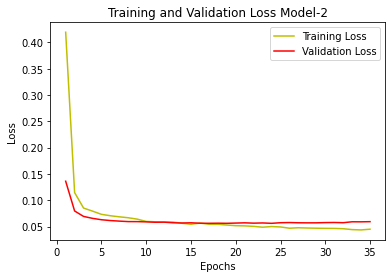

In [ ]:
#here the program display the distribution of the loss fucntion according to the propagations
#it appears the losses reduce as the propagations progress which is positve sign
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss Model-2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

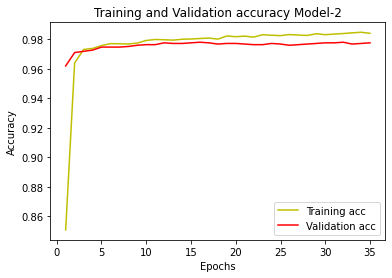

In [ ]:
# Plot the training accuracy and validation accuracy
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy Model-2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

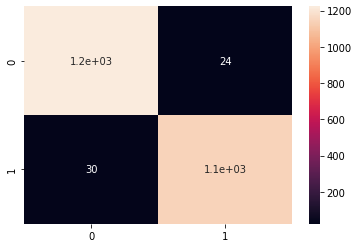

In [ ]:
y_pred = model1.predict(x_test)
y_pred = (y_pred > 0.5) # find out best method to get appropriate prediction value

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

## Prediction

In [ ]:
#Prediction on the test set
test = pd.read_csv("test_100r.csv")
test_copy = test.copy()
test_copy.drop(['id','concave points_worst', 'concavity_mean'], axis=1, inplace=True) # remove the correlated column based on training data
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_copy)
prediction = model1.predict(test_scaled)
prediction = (prediction > 0.5) # to change the dtype numeric to boolean value
test['diagnosis']=prediction.astype(int) # change the dtype boolean to integer(0 or 1)

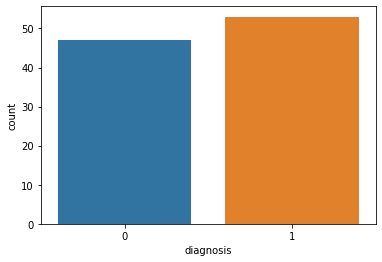

In [ ]:
sns.countplot(x="diagnosis", data=test) # to visualize the output

> ><p align= "Justify"> In this dataset, the predicting column is the column diagnosis. It shows 48% of 0 for a benign tumour and 52% of 1 for a malign tumour from the predicted vadidation data. 

# Recurrent Neural Network

## Model Description 

**Model 2: Recurrent Neural Network**

><p align= "Justify">A Recurrent Neural Network is a type of Artificial Neural network with the capacity to store information on a long short term memory due to the loop feedback it uses to make predictions. This model is a sequence to sequence because data are processed one layer after the other as the output of a layer is the input of the next layer (Géron, 2019). The following architecture uses a sequential model with dense layers because of the vector transformation of the data, a dropout to reduce the overfitting, and the Long Short Term Memory to remember the data to select what to keep and what to forget for an accurate prediction. 

><p align= "Justify">The programme will convert each data into vectors for a better representation. The input layer converts the information as follows: the input dimension is 32, which represents the vocabulary size, the sequence length is 28, the input length, and the length of each data vector is 1, which is the output dimension. The input converted data are passed in 100-memory units filtered as the data progress in the memory. The output layer uses a single neuron for the prediction and a sigmoid activator, as is a classification problem. The compilation used a Binary Cross-Entropy loss function for the classification, a 'rmsprop' optimiser for a faster process and accuracy as the metric.

In [ ]:
#RNN model
from keras.layers import Dense, Activation, Dropout, LSTM, Embedding

embeding_size=32
model2 = Sequential()
model2.add(Embedding(embeding_size, input_length=28, output_dim=1))
model2.add(LSTM(100))
model2.add(Dense(1,activation='sigmoid'))
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 1)             32        
                                                                 
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
_________________________________________________________________
None


> ><p align= "Justify">The summary presents 40933 parameters that the model will use for the train. The embedding has produced 32 parameters, the LSTM 40800 and the dense layers 101 parameters.

In [ ]:
#Compile the model for back propagation 
model2.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, verbose=1, epochs=30, batch_size=1000, validation_data=(x_test, y_test))
# epochs is define the number of times of front and back propagation
# batch_size define the iteration by its size(overall data/batch size=iterations)


Epoch 1/30
22/22 [==============================] - 6s 92ms/step - loss: 0.6590 - accuracy: 0.6255 - val_loss: 0.7164 - val_accuracy: 0.6305
Epoch 2/30
22/22 [==============================] - 1s 33ms/step - loss: 0.4907 - accuracy: 0.7682 - val_loss: 0.3721 - val_accuracy: 0.8503
Epoch 3/30
22/22 [==============================] - 1s 30ms/step - loss: 0.3883 - accuracy: 0.8337 - val_loss: 0.3409 - val_accuracy: 0.8540
Epoch 4/30
22/22 [==============================] - 1s 34ms/step - loss: 0.3737 - accuracy: 0.8443 - val_loss: 0.3933 - val_accuracy: 0.8474
Epoch 5/30
22/22 [==============================] - 1s 32ms/step - loss: 0.3453 - accuracy: 0.8595 - val_loss: 0.3907 - val_accuracy: 0.8429
Epoch 6/30
22/22 [==============================] - 1s 33ms/step - loss: 0.3296 - accuracy: 0.8662 - val_loss: 0.3519 - val_accuracy: 0.8445
Epoch 7/30
22/22 [==============================] - 1s 31ms/step - loss: 0.3092 - accuracy: 0.8796 - val_loss: 0.3131 - val_accuracy: 0.8788
Epoch 8/30
22

## Model Analysis and Evaluation



><p align= "Justify">The losses in training and validation plotting show considerable deviations between the training and testing data, but there is a similar decrease in both losses as the front and back propagations progress. The same observation is drawn from the training and validation plotting, where the deviation between the training and testing dataset deviates from one another with an accuracy that increases steadily as the front and backpropagation progresses. However, the variation is not a good sign, and the confusion matrix can help understand how wrong the prediction is.

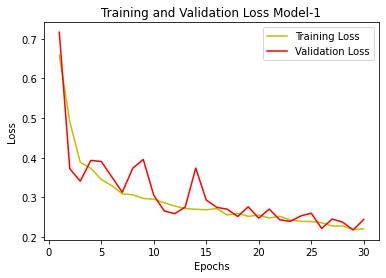

In [ ]:
# Plot the training loss and validation loss
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss Model-1') # title of the graph
plt.xlabel('Epochs') # define x axis
plt.ylabel('Loss') # define y axis
plt.legend()
plt.show()

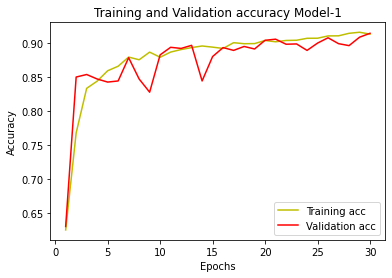

In [ ]:
# Plot the training accuracy and validation accuracy
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy Model-1') # title of the graph
plt.xlabel('Epochs') # define x axis
plt.ylabel('Accuracy') # define y axis
plt.legend()
plt.show()

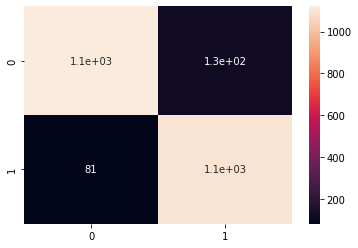

In [ ]:
y_pred = model2.predict(x_test)
y_pred = (y_pred > 0.5) # find out best method to get appropriate prediction value

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

## Prediction

In [ ]:
#Predict the test dataset
test1 = pd.read_csv("test_100r.csv")
test_copy1 = test1.copy()
test_copy1.drop(['id','concave points_worst', 'concavity_mean'], axis=1, inplace=True)
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_copy1) # remove the correlated column based on training data
prediction = model2.predict(test_scaled)
prediction = (prediction > 0.5) # to change the dtype numeric to boolean value
test1['diagnosis']=prediction.astype(int) # change the dtype boolean to integer(0 or 1)

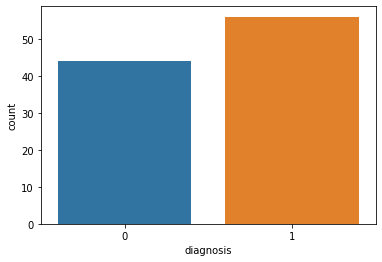

In [ ]:
sns.countplot(x="diagnosis", data=test1) # to visualize the output

> > <p align= "Justify">In this dataset, the predicting column is the column diagnosis. It shows 49% of 0 for a benign tumour and 51% of 1 for a malign tumour from the predicted vadidation data. 

# MLP Classifier (ANN)

## Model Description 

><p align= "Justify">The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers, and each layer is fully connected to the following one. The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. There may be one or more nonlinear hidden layers between the input and the output layers.

In [ ]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), # three layers with 10 neurans
                    max_iter=100, 
                    activation='relu', 
                    solver='adam', 
                    batch_size="auto") # to set default auto

mlp.fit(x_train,y_train) # fit the training data with MLPClaffifier

y_pred = mlp.predict(x_test)
print('Accuracy: {:2f}'.format(accuracy_score(y_test, y_pred))) # to predict the accuracy score

Accuracy: 0.974845


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Model Analysis and Evaluation

>From this graph of confusion matrix we can see only 28 FN and 37 FP values from over all the validation dataset.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


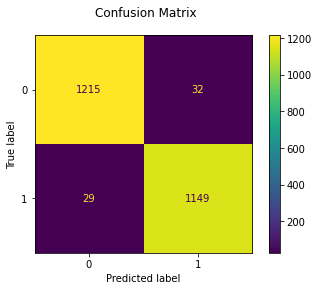

In [ ]:
#Plot the Confusion Matrix

from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
fig = plot_confusion_matrix(mlp, x_test,y_test, display_labels=mlp.classes_)
fig.figure_.suptitle("Confusion Matrix") # title of the graph
plt.show()

## Prediction

In [ ]:
#Prediction using the test set
test2 = pd.read_csv("test_100r.csv")
test_copy2 = test2.copy()
test_copy2.drop(['id','concave points_worst', 'concavity_mean'], axis=1, inplace=True)
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_copy2) # remove the correlated column based on training data
prediction = mlp.predict(test_scaled)
prediction = (prediction > 0.5) # to change the dtype numeric to boolean value
test2['diagnosis']=prediction.astype(int) # change the dtype boolean to integer(0 or 1)

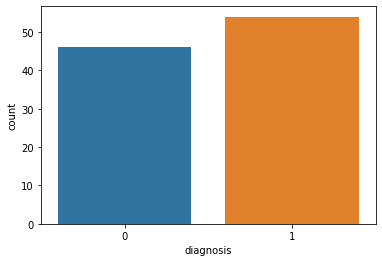

In [ ]:
sns.countplot(x="diagnosis", data=test2) # to visualize the output

> ><p align= "Justify">In this dataset, the predicting column is the column diagnosis. It shows 47% of 0 for a benign tumour and 53% of 1 for a malign tumour from the predicted vadidation data. 

# Final Predicted Data

In [ ]:
#Write the prediction to the test file
test.to_csv("test_100r.csv")
test.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0,11.914462,10.399366,68.532774,195.624827,0.078282,0.133505,0.030642,0.025076,0.199481,...,11.961359,85.471488,148.016468,0.087666,0.046050,0.289351,0.038040,0.349355,0.074248,0
1,1,7.107375,15.895246,93.288227,450.381515,0.100320,0.045394,0.018209,0.010265,0.178165,...,20.864080,100.798972,817.094638,0.075030,0.180301,0.492751,0.096460,0.395112,0.098559,0
2,2,11.575929,20.435897,108.126199,1316.008018,0.109270,0.345116,0.412742,0.165474,0.215813,...,19.029690,108.220078,1145.478120,0.082662,0.037770,0.424392,0.219969,0.503064,0.093896,1
3,3,17.049499,17.189036,122.326677,1042.768588,0.134032,0.093098,0.070388,0.078683,0.244361,...,24.928188,91.684245,947.978048,0.103626,0.631425,0.252219,0.032718,0.268289,0.082652,1
4,4,10.815883,16.936336,91.779285,1117.781440,0.110550,0.203851,0.318877,0.050364,0.232977,...,20.591944,114.458955,683.021463,0.181860,0.170216,0.508757,0.161784,0.574045,0.091577,1


> > Finally, we get the diagnosis value for the given test data and concatinate the diagnosis column with it.

# Results and Discussion

><p align= "Justify">For this binary classification task, the deep learning models used here are a dense deep neural network with adam optimiser and relu activation, LSTM, and MLPClassifier. The network's parameters are tuned by performing hyperparameters tuning using grid search and random search. The final parameters set for the respective models produce the best training accuracy with minimal loss and avoid the problem of overfitting. The data preprocessing includes encoding the categorical data, outliers removal and scaling and sampling the dataset. The hyperparameters tuning is performed using grid search and returns the best parameters for each model. The performance metric used here for training is accuracy, even though it's not the optimal metric for accuracy. The kaggle for binary classification uses a log loss metric function to predict a kaggle score.

><p align= "Justify">This model produced the highest score on Kaggle, about 0.69077. Finally, the model has identified about 56% of the testing dataset as malignant cancer and the rest benign.

approach  | sequential  |input param | output param |losses function| optimiser | metrics  | -------- | Kaggle Score |
----------|-------------|-------------|--------------|---------------|-----------|----------|----------|----------|
DNN       | layered data        |ReLu        |  Sigmoid     | Cross Entropy | Adam   | Accuracy |  xxxxx  |  0.69  |
----------|-------------|-------------|--------------|---------------|-----------|----------|----------|----------|
RNN       | Vectored data   |Embedding   |  Sigmoid     | Cross Entropy |  Rmsprop     | Accuracy |  LSTM(100)  |0.54  |
----------|-------------|-------------|--------------|---------------|-----------|----------|----------|----------|
ANN       | layered data   |ReLu   |  Sigmoid     | Cross Entropy |  Adam     | Accuracy |  Max iter(100)  |0.60  |


><p align= "Justify">Finally, recommend that the dense deep model be used for this brest cancer classification. We performed all the task requirements successfully and gained deeper understanding on deep learning models.

# **Reference list**
* <p align= "Justify"> ARA, S., DAS, A. & DEY, A. Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms.  2021 International Conference on Artificial Intelligence (ICAI), 5-7 April 2021 2021. 97-101.

* <p align= "Justify"> ATKIN, G., 2022. 🎧 Spotify Song Popularity Prediction (Outliers). [online] Kaggle.com. Available at: <https://www.kaggle.com/code/gcdatkin/spotify-song-popularity-prediction-outliers/notebook> [Accessed 26 March 2022].

* <p align= "Justify"> CHUDHEY, A. S., GOEL, M. & SINGH, M. Breast Cancer Classification with Random Forest Classifier with Feature Decomposition Using Principal Component Analysis. In: TIWARI, S., TRIVEDI, M. C., KOLHE, M. L., MISHRA, K. K. & SINGH, B. K., eds. Advances in Data and Information Sciences, 2022// 2022 Singapore. Springer Singapore, 111-120.

* <p align= "Justify"> GRUBBS, F. E. 1969. Procedures for Detecting Outlying Observations in Samples. Technometrics, 11, 1-21.

* <p align= "Justify"> GÉRON, A. 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, @OReillyMedia.

* <p align= "Justify"> Google Cloud. 2022. Overview of hyperparameter tuning  |  AI Platform Training  |  Google Cloud. [online] Available at: <https://cloud.google.com/ai-platform/training/docs/hyperparameter-tuning-overview> [Accessed 10 April 2022].

* <p align= "Justify"> KACHOUIE, N. N. & DEEBANI, W. 2020. Association Factor for Identifying Linear and Nonlinear Correlations in Noisy Conditions. ENTROPY-SWITZ, 22, 440.

* <p align= "Justify"> SEDDIK, A. F. & SHAWKY, D. M. Logistic regression model for breast cancer automatic diagnosis.  2015 SAI Intelligent Systems Conference (IntelliSys), 10-11 Nov. 2015 2015. 150-154.

* <p align= "Justify"> pandas?, H., Wu, C. and DAGA, N., 2022. How to calculate correlation between all columns and remove highly correlated ones using pandas?. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on> [Accessed 25 March 2022].

* <p align= "Justify"> Verywell Health. 2022. Differences Between a Malignant and Benign Tumor. [online] Available at: <https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240#:~:text=Benign%20tumors%20are%20noncancerous.,stage%20of%20cancer%20you%20have.> [Accessed 22 March 2022].

